<a href="https://colab.research.google.com/github/msjrich/Numbers-by-the-Boroughs/blob/main/Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plot
%matplotlib inline

In [2]:
#contains individual player statistics for every season they played in the WNBA up to 2019
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/WNBA-stats/master/wnba-player-stats.csv')

In [3]:
#contains analytics on individual games played up to 2019
df2 = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/WNBA-stats/d144c6cf00932970e106ae8fcdf5ca1e39f2fa4d/wnba-team-elo-ratings.csv')

In [ ]:
#finding columns with missing values
df.isnull().sum()

player_ID            0
Player               0
year_ID              0
Age                  0
Tm                   0
tm_gms               0
Tm_Net_Rtg           0
Pos                 24
G                    0
MP                   0
MP_pct               0
PER                  5
TS_pct              35
ThrPAr              44
FTr                 44
ORB_pct              5
TRB_pct              5
AST_pct              5
STL_pct              5
BLK_pct              5
TOV_pct             22
USG_pct              5
OWS                  0
DWS                  0
WS                   0
WS40                 5
Composite_Rating     5
Wins_Generated       0
dtype: int64

In [ ]:
#zeroing out numeric columns with blank variables and converting the missing values in the Position column to 'M' 
df['PER'] = df['PER'].fillna(0)
df['TS_pct'] = df['TS_pct'].fillna(0)
df['ThrPAr'] = df['FTr'].fillna(0)
df['TOV_pct'] = df['TOV_pct'].fillna(0)
df['USG_pct'] = df['USG_pct'].fillna(0)
df['WS40'] = df['WS40'].fillna(0)
df['Composite_Rating'] = df['Composite_Rating'].fillna(0)
df['FTr'] = df['FTr'].fillna(0)
df['ORB_pct'] = df['ORB_pct'].fillna(0)
df['TRB_pct'] = df['TRB_pct'].fillna(0)
df['AST_pct'] =df['AST_pct'].fillna(0)
df['STL_pct'] = df['STL_pct'].fillna(0)
df['BLK_pct'] =df['BLK_pct'].fillna(0)
df['Pos'].fillna("M", inplace=True)

In [ ]:
#finding the number of players associated with each team
df.groupby(['Tm'])['Player'].count()

Tm
ATL    166
CHA    130
CHI    187
CLE     91
CON    220
DAL     56
DET    176
HOU    159
IND    258
LAS    299
LVA     28
MIA     40
MIN    278
NYL    303
ORL     51
PHO    324
POR     38
SAC    167
SAS    198
SEA    260
TUL     85
UTA     78
WAS    291
Name: Player, dtype: int64

In [ ]:
#Cynthia was the first player to be awared the Most Valuable Player award. She won in the first and second MVP awarded in the league.
#This indicates her perfomace for each season she played
df.loc[df['player_ID'] == 'coopecy01w']

,player_ID,Player,year_ID,Age,Tm,tm_gms,Tm_Net_Rtg,Pos,G,MP,MP_pct,PER,TS_pct,ThrPAr,FTr,ORB_pct,TRB_pct,AST_pct,STL_pct,BLK_pct,TOV_pct,USG_pct,OWS,DWS,WS,WS40,Composite_Rating,Wins_Generated
2737,coopecy01w,Cynthia Cooper,2003,40,HOU,34,4.5,G,4,144,10.5%,22.1,0.636,0.737,0.737,1.9,4.7,30.8,1.7,0.6,21.8,23.2,0.7,0.2,0.8,0.234,5.0,0.71
3332,coopecy01w,Cynthia Cooper,2000,37,HOU,32,18.1,G,31,1085,83.8%,23.4,0.590,0.429,0.429,2.3,5.3,27.5,2.1,0.5,17.5,25.8,5.2,1.8,7.0,0.259,6.3,6.03
3542,coopecy01w,Cynthia Cooper,1999,36,HOU,32,13.3,G,31,1101,85.7%,29.5,0.614,0.500,0.500,2.1,5.2,31.9,2.2,0.8,15.7,29.3,7.7,1.5,9.2,0.335,9.2,7.70
3692,coopecy01w,Cynthia Cooper,1998,35,HOU,30,17.5,G,30,1051,86.5%,31.1,0.604,0.541,0.541,3.1,6.8,27.0,2.6,0.9,14.4,29.9,8.1,1.9,10.0,0.382,10.7,8.09
3809,coopecy01w,Cynthia Cooper,1997,34,HOU,28,8.7,G,28,982,86.9%,32.2,0.629,0.490,0.490,4.3,7.5,31.4,3.4,0.5,18.1,28.7,8.1,1.3,9.4,0.385,10.6,7.53


In [4]:
#Sheryl Swoopes played with Cooper on the first WNBA dynasty team, the Houston Comets. 
#She would have a longer professional playing career and went on to win three MVP awards.
df.loc[df['player_ID'] == 'swoopsh01w']

,player_ID,Player,year_ID,Age,Tm,tm_gms,Tm_Net_Rtg,Pos,G,MP,MP_pct,PER,TS_pct,ThrPAr,FTr,ORB_pct,TRB_pct,AST_pct,STL_pct,BLK_pct,TOV_pct,USG_pct,OWS,DWS,WS,WS40,Composite_Rating,Wins_Generated
1410,swoopsh01w,Sheryl Swoopes,2011,40,TUL,34,-16.9,F-G,33,879,64.4%,12.5,0.494,0.358,0.181,2.9,9.8,17.1,1.5,0.8,14.1,16.6,0.7,0.0,0.7,0.031,-3.2,0.83
1939,swoopsh01w,Sheryl Swoopes,2008,37,SEA,34,3.4,F-G,29,706,51.9%,15.4,0.470,0.328,0.307,4.6,10.8,15.3,3.3,1.1,12.5,16.2,0.9,1.5,2.5,0.139,1.1,2.16
2020,swoopsh01w,Sheryl Swoopes,2007,36,HOU,34,-4.5,F-G,3,106,7.8%,10.1,0.430,0.280,0.160,3.5,9.9,17.7,2.4,0.8,25.2,14.8,-0.1,0.1,0.0,0.007,-3.6,0.08
2200,swoopsh01w,Sheryl Swoopes,2006,35,HOU,34,2.2,F-G,31,1111,80.2%,19.2,0.490,0.206,0.291,3.9,10.1,20.4,3.1,0.6,13.1,23.8,1.9,2.5,4.4,0.159,2.4,4.04
2375,swoopsh01w,Sheryl Swoopes,2005,34,HOU,34,2.0,F-G,33,1225,89.1%,26.6,0.543,0.154,0.370,3.1,7.0,25.7,3.2,1.9,11.3,27.0,5.6,1.6,7.1,0.233,5.3,6.21
2553,swoopsh01w,Sheryl Swoopes,2004,33,HOU,34,-1.4,F-G,31,1070,78.1%,20.6,0.490,0.152,0.210,4.7,9.4,20.6,2.6,1.3,11.2,25.1,2.6,1.6,4.1,0.155,2.4,3.91
2729,swoopsh01w,Sheryl Swoopes,2003,32,HOU,34,4.5,F-G,31,1084,79.4%,23.6,0.495,0.182,0.286,4.1,8.8,25.1,4.2,2.1,13.0,26.9,2.6,2.7,5.3,0.195,4.2,4.97
2905,swoopsh01w,Sheryl Swoopes,2002,31,HOU,32,8.4,F-G,32,1154,89.8%,25.5,0.513,0.157,0.303,3.5,8.9,23.4,4.6,1.8,13.1,29.7,3.3,3.8,7.1,0.247,6.1,6.36
3330,swoopsh01w,Sheryl Swoopes,2000,29,HOU,32,18.1,F-G,31,1090,84.2%,32.0,0.587,0.188,0.300,5.4,12.2,23.6,4.6,2.6,13.0,28.6,6.3,3.6,9.8,0.361,10.5,8.26
3543,swoopsh01w,Sheryl Swoopes,1999,28,HOU,32,13.3,F-G,32,1100,85.6%,28.9,0.539,0.200,0.249,6.1,12.1,25.7,4.0,3.6,13.3,27.7,5.0,3.1,8.1,0.294,8.0,7.06


In [ ]:
#The Houston team is one of six franchises that have been discontinued since the league has been existence: 
#Charlotte, Cleveland, Portlans, Sacramento and Miami are the other five.
array = ['HOU', 'CHA', 'CLE', 'POR', 'SAC', 'MIA']
df.loc[df['Tm'].isin(array)]

,player_ID,Player,year_ID,Age,Tm,tm_gms,Tm_Net_Rtg,Pos,G,MP,MP_pct,PER,TS_pct,ThrPAr,FTr,ORB_pct,TRB_pct,AST_pct,STL_pct,BLK_pct,TOV_pct,USG_pct,OWS,DWS,WS,WS40,Composite_Rating,Wins_Generated
1710,powelni01w,Nicole Powell,2009,27,SAC,34,-3.0,F,34,1035,75.6%,21.3,0.547,0.202,0.202,6.2,12.1,14.9,2.5,0.7,13.9,25.7,3.4,1.0,4.4,0.171,2.5,3.83
1711,walkede01w,DeMya Walker,2009,31,SAC,34,-3.0,F,34,821,59.9%,11.8,0.516,0.292,0.292,8.2,12.0,14.5,1.7,1.7,24.6,20.1,0.0,0.6,0.6,0.029,-2.9,0.89
1712,penicti01w,Ticha Penicheiro,2009,34,SAC,34,-3.0,G,30,724,52.9%,11.5,0.436,0.504,0.504,2.1,7.0,34.1,2.2,0.5,27.4,14.2,0.2,0.4,0.6,0.034,-2.8,0.81
1713,maigaha01w,Hamchetou Maiga-Ba,2009,31,SAC,34,-3.0,F,34,676,49.4%,15.5,0.524,0.302,0.302,6.3,8.3,10.8,2.4,1.0,15.3,22.2,1.1,0.4,1.5,0.089,-0.7,1.46
1714,brunsre01w,Rebekkah Brunson,2009,27,SAC,34,-3.0,F,27,665,48.5%,22.3,0.549,0.416,0.416,12.6,17.9,2.7,3.1,2.0,13.0,23.0,2.0,1.1,3.0,0.183,3.0,2.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3866,savasla01w,Laure Savasta,1997,23,SAC,28,-10.0,G,14,157,13.9%,-0.5,0.337,0.200,0.200,0.8,2.4,13.8,1.4,0.5,30.0,19.9,-0.6,-0.2,-0.8,-0.204,-11.1,-0.46
3867,angelyv01w,Yvette Angel,1997,33,SAC,28,-10.0,G,5,90,8.0%,7.8,0.404,0.188,0.188,2.7,6.3,22.4,2.4,0.9,31.6,12.6,-0.1,0.0,-0.1,-0.061,-5.9,-0.04
3868,gravede01w,Denique Graves,1997,21,SAC,28,-10.0,C,22,86,7.6%,-5.1,0.262,0.296,0.296,4.2,11.0,0.0,0.0,5.5,28.2,22.1,-0.6,0.0,-0.6,-0.287,-14.1,-0.38
3869,clarkma01w,Margold Clark,1997,26,SAC,28,-10.0,F-C,5,46,4.1%,2.0,0.394,0.250,0.250,0.0,8.2,3.9,1.2,1.7,18.4,10.6,0.0,0.0,0.0,-0.042,-6.4,-0.03


In [5]:
#needed to decipher which columns could be utilized for certain comparison operators to analyze player performance (> & < specifically) 
df.dtypes

player_ID            object
Player               object
year_ID               int64
Age                   int64
Tm                   object
tm_gms                int64
Tm_Net_Rtg          float64
Pos                  object
G                     int64
MP                    int64
MP_pct               object
PER                 float64
TS_pct              float64
ThrPAr              float64
FTr                 float64
ORB_pct             float64
TRB_pct             float64
AST_pct             float64
STL_pct             float64
BLK_pct             float64
TOV_pct             float64
USG_pct             float64
OWS                 float64
DWS                 float64
WS                  float64
WS40                float64
Composite_Rating    float64
Wins_Generated      float64
dtype: object

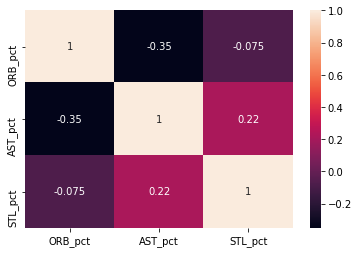

In [15]:
#Correlation is a practice I found used in sports analysis
#This is measuring correlation between a palyer's Offensive Rebounding, Assists and Steal percentages
#The negative and miniscule rates of correlation indicates no true linear realtionship between these categories
correlation = df[["ORB_pct", "AST_pct", "STL_pct"]].corr()
sns.heatmap(correlation, annot=True)

In [7]:
#Upon analysis of the second dataset, it appears some of the games are duplicated, with each team being alternately being indicated as Team 1 and Team 2 in subsequent columns
#This complicates analysis to an extent
df2.head()

,season,date,team1,team2,name1,name2,neutral,playoff,score1,score2,elo1_pre,elo2_pre,elo1_post,elo2_post,prob1,is_home1
0,2019,10/10/2019,WAS,CON,Washington Mystics,Connecticut Sun,0,1,89,78,1684,1634,1692,1627,0.718,1
1,2019,10/10/2019,CON,WAS,Connecticut Sun,Washington Mystics,0,1,78,89,1634,1684,1627,1692,0.282,0
2,2019,10/8/2019,WAS,CON,Washington Mystics,Connecticut Sun,0,1,86,90,1693,1626,1684,1634,0.476,0
3,2019,10/8/2019,CON,WAS,Connecticut Sun,Washington Mystics,0,1,90,86,1626,1693,1634,1684,0.524,1
4,2019,10/6/2019,WAS,CON,Washington Mystics,Connecticut Sun,0,1,94,81,1671,1648,1693,1626,0.399,0


In [8]:
#I added a column to the dataset that I hoped to use as a starting point for figuring out which rows to exclude
#However I realized that not all of the games are duplicated and I'm not able to determine a pattern that would help in targeting unnecessary rows
df2['diff'] = df2['score1'] - df2['score2']
df2

,season,date,team1,team2,name1,name2,neutral,playoff,score1,score2,elo1_pre,elo2_pre,elo1_post,elo2_post,prob1,is_home1,diff
0,2019,10/10/2019,WAS,CON,Washington Mystics,Connecticut Sun,0,1,89,78,1684,1634,1692,1627,0.718,1,11
1,2019,10/10/2019,CON,WAS,Connecticut Sun,Washington Mystics,0,1,78,89,1634,1684,1627,1692,0.282,0,-11
2,2019,10/8/2019,WAS,CON,Washington Mystics,Connecticut Sun,0,1,86,90,1693,1626,1684,1634,0.476,0,-4
3,2019,10/8/2019,CON,WAS,Connecticut Sun,Washington Mystics,0,1,90,86,1626,1693,1634,1684,0.524,1,4
4,2019,10/6/2019,WAS,CON,Washington Mystics,Connecticut Sun,0,1,94,81,1671,1648,1693,1626,0.399,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10483,1997,6/21/1997,SAC,LVA,Sacramento Monarchs,Utah Starzz,0,0,73,61,1500,1500,1521,1479,0.387,0,12
10484,1997,6/21/1997,NYL,LAS,New York Liberty,Los Angeles Sparks,0,0,67,57,1500,1500,1519,1481,0.387,0,10
10485,1997,6/21/1997,LAS,NYL,Los Angeles Sparks,New York Liberty,0,0,57,67,1500,1500,1481,1519,0.613,1,-10
10486,1997,6/21/1997,LVA,SAC,Utah Starzz,Sacramento Monarchs,0,0,61,73,1500,1500,1479,1521,0.613,1,-12
